# I. Расчет проведем по данным 1967 года; исходные данные берем из таблицы 3.10.2.1 и 3.10.2.2, используя промысловые данные:

## - пластовое давление	$Р_{пл} = 11,57 МПа$,
## - пластовая температура	$t_{пл} = 58 °С$,
## - давление насыщения	$Р_{нас} = 7,65 МПа$,
## - массовая газонасыщенность	$G_м = 65,56 \frac{м^3}{т}$, 
## - объемный коэффициент 	$b_н = 1,195$,
## - плотность пластовой нефти	$ρ_{нпл} = 773 \frac{кг}{м^3}$,
## - плотность дегазированной нефти	$ρ_{нд} = 854,1 \frac{кг}{м^3}$,
## - содержание метана	$у_м = 50,24$ %,
## - содержание азота	$у_a = 2,3$ %,
## - плотность газа	$ρ_г = 1,222 \frac{кг}{м^3}$.
## Расчет при $t = 20 °С$


# 1. Расчет функции $f_{ШБП}$:
## $f_{ШБП}=\frac{701,8}{G_м*(у_м-0,8*у_a)}$

In [2]:
import math
G_m=65.56
y_m=0.5024
y_a=0.023
f_шбп=math.trunc(100*701.8/(G_m*(y_m-0.8*y_a)))/100
print ('f_шбп=', f_шбп ) 

f_шбп= 22.11


# 2. Расчет $Р_{нас20}$:
## $Р_{нас20} = Р_{нас} + \frac{20 – t_{пл}}{9,157 + f_{ШБП}}$

In [3]:
P_нас=7.65
t_пл=58
Р_нас20=math.trunc(100*(P_нас +(20-t_пл)/(9.157+f_шбп)))/100
print ('Р_нас20=', Р_нас20, 'МПа' ) 

Р_нас20= 6.43 МПа


# 3. Задаем ряд значений $n_i$:
## $n_i=\frac{Р_i}{Р_{нас20}} =(1,0;0,8;0,6;0,4;0,2;0,1;\frac{0,1}{Р_{нас20}})$.
# 4. Вычисляем матрицу давлений $Р_i$:
## $Р_i = n_i · Р_{нас20}$

In [4]:
import numpy as np
n_i = np.array([1, 0.8, 0.6, 0.4, 0.2, 0.1, 0.1/Р_нас20])
P_i=n_i*Р_нас20
print(P_i)

[ 6.43   5.144  3.858  2.572  1.286  0.643  0.1  ]


# 5. Рассчитываем коэффициенты $R_i$:
## $R_i=\frac{lg⁡(n_i)}{lg⁡(10∙Р_{нас20})}$ 

In [5]:
R_i=np.trunc(1000*np.log10(n_i)/np.log10(10*Р_нас20))/1000
a = 0
while a < 7: 
    print ('R_i =', R_i[a])
    a=a+1

R_i = 0.0
R_i = -0.053
R_i = -0.122
R_i = -0.22
R_i = -0.386
R_i = -0.553
R_i = -1.0


# 6. Расчет коэффициентов $D_1 и U_1 (ρ ̅_{нд} = 0,8541; ρ ̅_г = 0,945)$:
## $D_1=4,06(ρ ̅_{нд}∙ρ ̅_г-1,045)$
## $U_1=ρ ̅_{нд}∙G_м-186$

In [6]:
ρнд_ = 0.8541
ρг_ = 0.945
D_1= math.trunc(100*4.06* (ρнд_ * ρг_-1.045))/100
U_1= math.trunc(100*(ρнд_*G_m-186))/100
print ('D_1=', D_1)
print ('U_1=', U_1)

D_1= -0.96
U_1= -130.0


# 7. Расчет объема выделяющегося из нефти газа:
# $G_{м,i}=Г_м∙R_i [D_1 (1+R_i )-1]$

In [7]:
G_i= np.trunc(100*G_m*R_i*(D_1*(1+R_i)-1))/100
a = 0
while a < 7: 
    print ('G_m,i =', G_i[a])
    a=a+1

G_m,i = -0.0
G_m,i = 6.63
G_m,i = 14.73
G_m,i = 25.22
G_m,i = 40.22
G_m,i = 51.81
G_m,i = 65.56


# 8. Расчет газонасыщенности пластовой нефти $Г_{м,i}$:
## $Г_{м,i}=Г_м-G_{м,i}$

In [8]:
Г_i=G_m-G_i
a = 0
while a < 7: 
    print ('Г_i =', Г_i[a])
    a=a+1

Г_i = 65.56
Г_i = 58.93
Г_i = 50.83
Г_i = 40.34
Г_i = 25.34
Г_i = 13.75
Г_i = 0.0


# 9. Расчет относительной плотности выделяющегося из нефти газа:
## $ρ ̅_{гвi}=ρ ̅_г-0,0036(1+R_i)(105,7+U_1∙R_i)$

In [9]:
ρ_гвi=np.trunc(1000*(ρг_-0.0036*(1+R_i)*(105.7+U_1*R_i)))/1000
a = 0
while a < 7: 
    print ('ρ_гвi =', ρ_гвi[a])
    a=a+1

ρ_гвi = 0.564
ρ_гвi = 0.561
ρ_гвi = 0.56
ρ_гвi = 0.567
ρ_гвi = 0.6
ρ_гвi = 0.659
ρ_гвi = 0.945


# 10. Расчет относительной плотности газа, остающегося в нефти в растворенном состоянии:
## $ρ ̅_{гр,i}=\frac{Г_м}{Г_{м,i}}*(ρ ̅_г-ρ ̅_{гв,i}*\frac{G_{м,i}}{Г_м})$

In [21]:
ρ_грi=np.trunc(1000*G_m/Г_i*(ρг_-ρ_гвi*G_i/G_m))/1000
a = 0
while a < 6: 
    print ('ρ_грi =', ρ_грi[a])
    a=a+1

ρ_грi = 0.945
ρ_грi = 0.988
ρ_грi = 1.056
ρ_грi = 1.181
ρ_грi = 1.492
ρ_грi = 2.022


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


## $ρ ̅_{гр,7}$ должна быть найдена экстраполяцией графической зависимости $ρ ̅_{гр,i}=f(Р)$ для Р = 0,1 МПа.

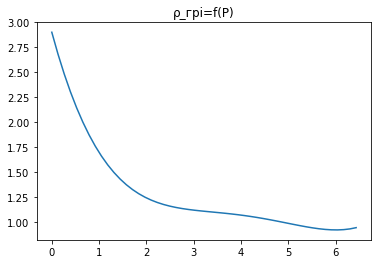

ρ_гр7= 2.72


In [12]:
from pylab import *
import numpy as np
x=[0.643, 1.286,  2.572,  3.858,  5.144, 6.43]
y=[2.022, 1.492,1.181,1.056,0.988,0.945,]
z = np.polyfit(x, y, 4)
f = np.poly1d(z)
x_new = np.linspace(0, 6.43, 50)
y_new = f(x_new)
plot(x_new, y_new)
plt.title('ρ_грi=f(P)')
show()
x_1=0.1
y_1=np.trunc(100*f(0.1))/100
print ('ρ_гр7=', y_1)
ρ_грi[6]=y_1

## 11. Расчет безразмерного параметра $λ_i$:
## $λ_i=3,54(1,2147-ρ ̅_{нд} )+1,0337ρ ̅_{грi}+5,581ρ ̅_{нд} (1-1,61ρ ̅_{нд}∙10^{-3} Г_{мi})10^{-3} Г_{мi}$

In [13]:
λ_i=np.trunc((3.54*(1.2147-ρнд_)+1.0337*ρ_грi+5.581*ρнд_*(1-1.61*ρнд_/1000*Г_i)*Г_i/1000)*1000)/1000
a = 0
while a < 7: 
    print (' λ_i=', λ_i[a])
    a=a+1

 λ_i= 2.537
 λ_i= 2.555
 λ_i= 2.593
 λ_i= 2.678
 λ_i= 2.935
 λ_i= 3.43
 λ_i= 4.088


# 12. Расчет объемного коэффициента нефти:
## $b_i=1+1,0733ρ ̅_{нд}∙λ_i∙10^{-3}∙Г_{мi}-6,5∙10^{-4}∙Р_i$

In [14]:
b_i=np.trunc((1+1.0733*ρнд_*λ_i/1000*Г_i-6.5/10000*P_i)*1000)/1000
a = 0
while a < 7: 
    print (' b_i=', b_i[a])
    a=a+1

 b_i= 1.148
 b_i= 1.134
 b_i= 1.118
 b_i= 1.097
 b_i= 1.067
 b_i= 1.042
 b_i= 0.999


# 13. Расчет относительной плотности газонасыщенной нефти:
## $ρ ̅_{нг,i}=\frac{ρ ̅_{нд}}{b_{нi}}(1+1,293ρ ̅_{грi}∙10^{-3}∙Г_{мi} )$

In [15]:
ρ_нгi=np.trunc(1000*ρнд_/b_i*(1+1.293*ρ_грi/1000*Г_i))/1000
a = 0
while a < 7: 
    print (' ρ_нгi=', ρ_нгi[a])
    a=a+1

 ρ_нгi= 0.803
 ρ_нгi= 0.809
 ρ_нгi= 0.816
 ρ_нгi= 0.826
 ρ_нгi= 0.839
 ρ_нгi= 0.849
 ρ_нгi= 0.854


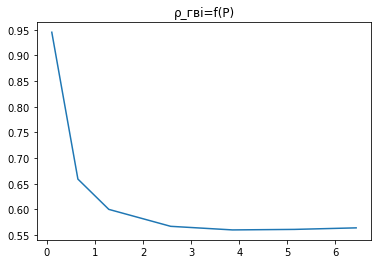

In [16]:
x = P_i
y = ρ_гвi
plot(x, y)
plt.title('ρ_гвi=f(P)')
show()

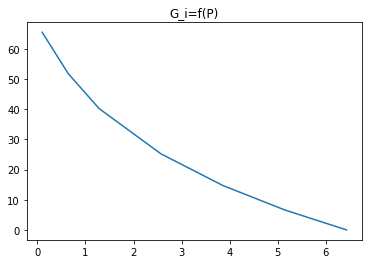

In [17]:
x = P_i
y = G_i
plot(x, y)
plt.title('G_i=f(P)')
show()

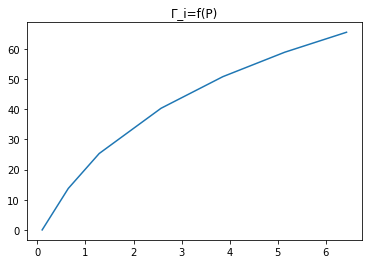

In [18]:
x = P_i
y = Г_i
plot(x, y)
plt.title('Г_i=f(P)')
show()

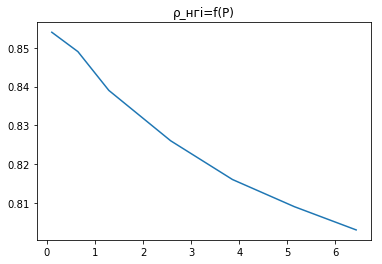

In [19]:
x = P_i
y = ρ_нгi
plot(x, y)
plt.title('ρ_нгi=f(P)')
show()

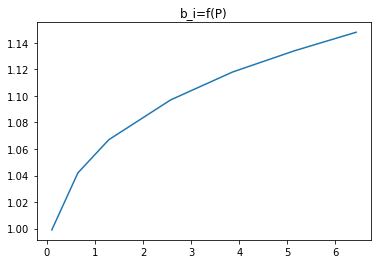

In [20]:
x = P_i
y = b_i
plot(x, y)
plt.title('b_i=f(P)')
show()